# Python/NumPy FFT demo (Scipy lectures chap 1.5)

simple demonstration of using an FFT for signal processing.  Lets read the greyscale image moonlanding.png and display it with matplotlib.

<class 'numpy.ndarray'> (474, 630) float32


<IPython.core.display.Javascript object>


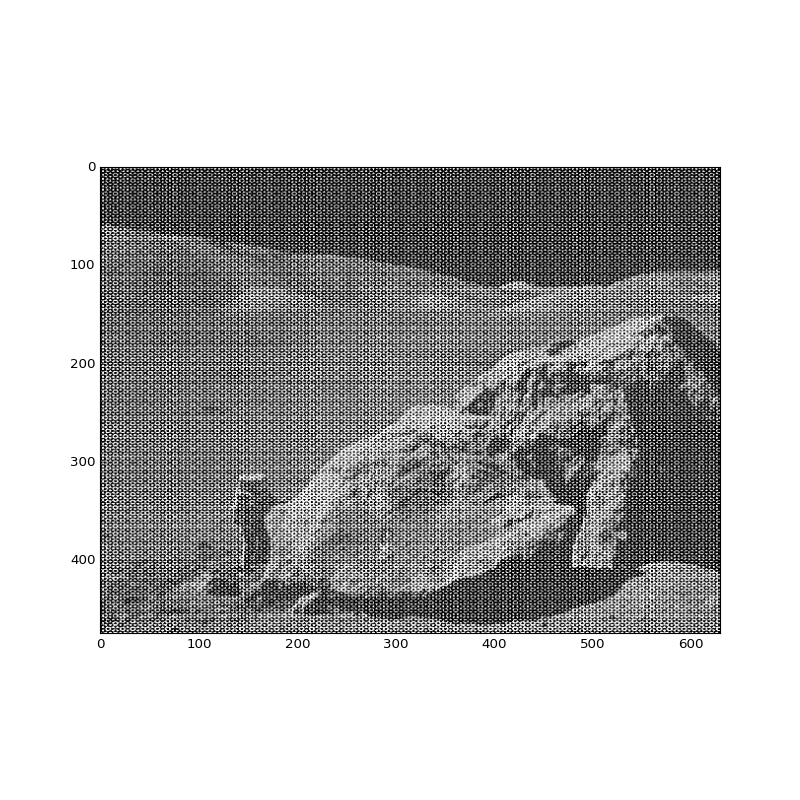

In [85]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np

# use interactive plots
%matplotlib notebook

# read the data from disk
image = plt.imread('moonlanding.png')

# make the figure size larger (jupyter notebooks only.  Caution - large images take longer to run)
rcParams['figure.figsize'] = (10.0, 10.0)

print(type(image), image.shape, image.dtype)
plt.imshow(image, cmap='gray')

plt.show()

## Now we transform the image to the frequency domain using FFT
* see http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.fft.fft2.html
* fft2 returns a numpy array with a complex data type (dtype)
* we're only concerned with the real part

complex128


<IPython.core.display.Javascript object>


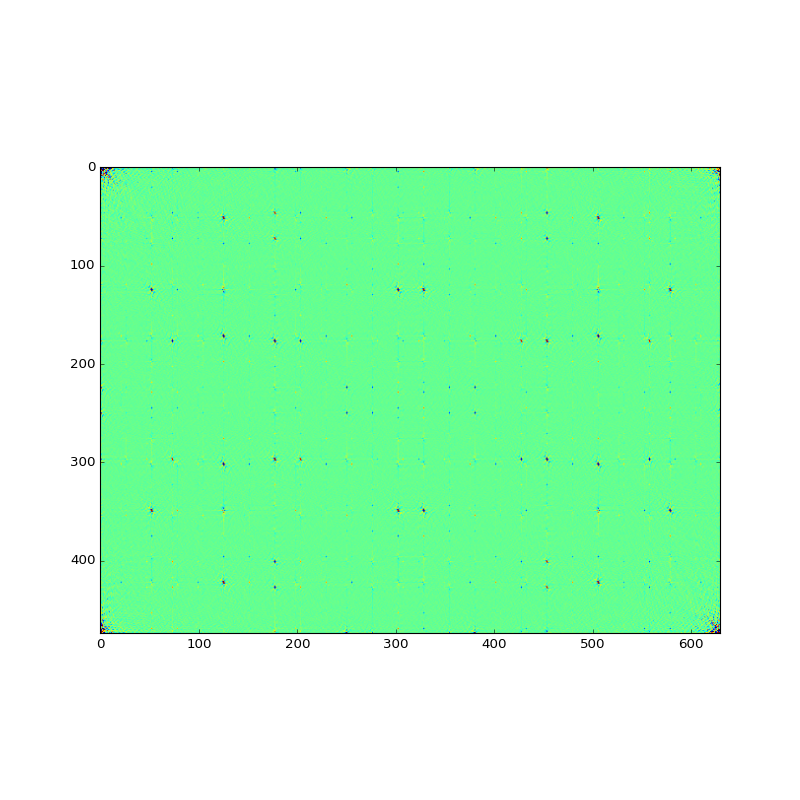

-9421.09976601 126598.456313


In [86]:
fft_image = np.fft.fft2(image)
print(fft_image.dtype)

# display the fft
plt.imshow(fft_image.real, vmin=-900, vmax=1000)
print(fft_image.real.min(), fft_image.real.max())
plt.show()

## Lets try removing the high amplitude areas in the corners
* using numpy slices.  One corner at a time.
* there are many more strategies but it's a huge field

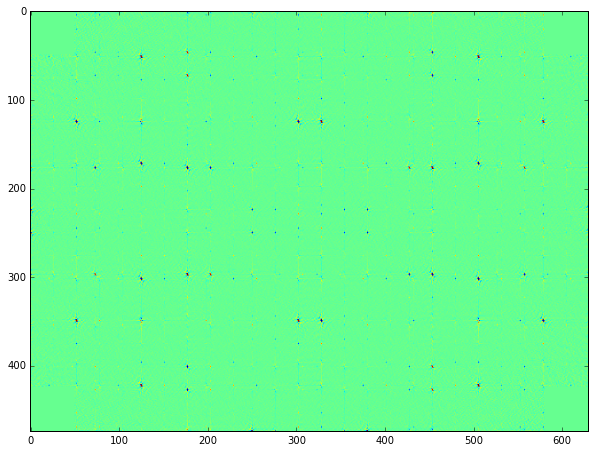

In [80]:
# upper left
fft_image[0:45,0:45] = 0
# lower left
fft_image[-45:,0:45] = 0
# upper right
fft_image[0:45,-45:] = 0
# lower right
fft_image[-45:,-45:] = 0
plt.imshow(fft_image.real, vmin=-900, vmax=1000)
plt.show()

## Now we invert the cleaned up image

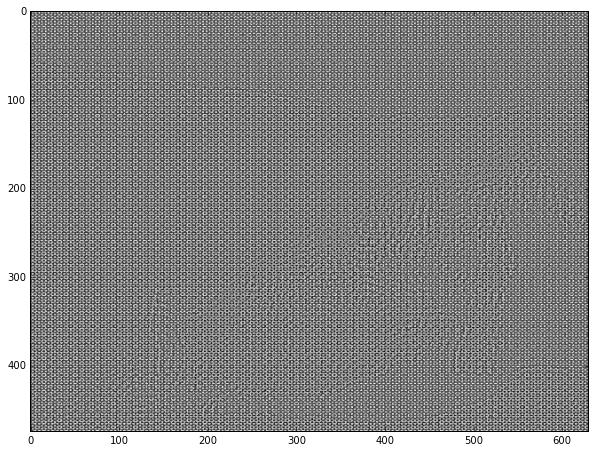

In [81]:
ifft_image = np.fft.ifft2(fft_image)
plt.imshow(ifft_image.real, cmap='gray')
plt.show()

## Opps! we removed most of the signal and left the noise.  Lets try again, removing everything except the corners

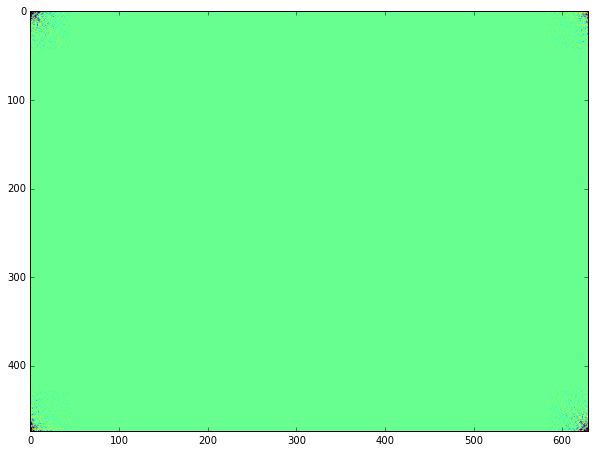

In [82]:
fft_image2 = np.fft.fft2(image)
# discard everything except first N pixels on the left and last N on the right
fft_image2[:,45:-45] = 0
# also discard everything except the first N pixels on top and last N on bottom
fft_image2[45:-45,:] = 0
plt.imshow(fft_image2.real, vmin=-900, vmax=1000)
plt.show()

## Invert again

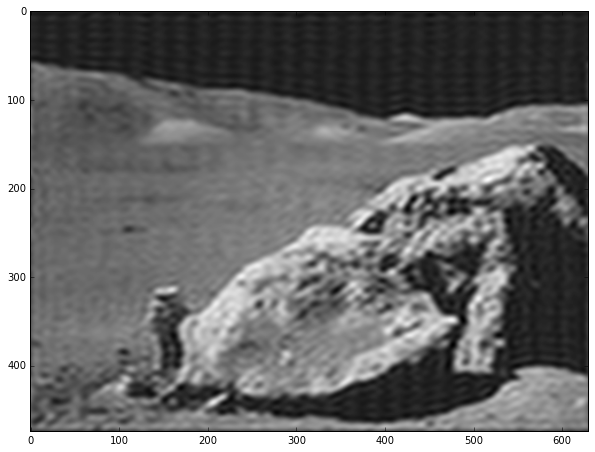

In [83]:
ifft_image2 = np.fft.ifft2(fft_image2)
plt.imshow(ifft_image2.real, cmap='gray')
plt.show()

## Artifacts remain but high frequency noise is greatly reduced
* could use more sophistocated techniques